In [2]:
from sklearn import datasets
import pandas as pd
data = datasets.load_breast_cancer()

# Lea el DataFrame, primero usando los datos de la función
df = pd.DataFrame(data.data, columns = data.feature_names)# Agregue una columna de destino y rellénela con los datos de destino
df['target'] = data.target# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
from sklearn.model_selection import train_test_split

#aquí hago que mi variable "X" sea igual al marco de datos "df", pero con las columnas "Dirección" y "precio_venta" eliminadas
X = df.drop(["target"], axis = 1)
#aquí creo una variable "y" con la columna "precio_venta" para mi marco de datos (df)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 101)

## Capacidad¶

La capacidad de un modelo se refiere al tamaño y la complejidad de los patrones que puede aprender. En el caso de las redes neuronales, esto dependerá en gran medida de la cantidad de neuronas que tenga y de cómo estén conectadas entre sí. Si parece que su red no está adaptando los datos, debería intentar aumentar su capacidad.

## activación 'relu'

La función de activación lineal rectificada o ReLU para abreviar es una función lineal por partes que generará la entrada directamente si es positiva; de lo contrario, generará cero. ... La función de activación lineal rectificada supera el problema del gradiente de desaparición, lo que permite que los modelos aprendan más rápido y funcionen mejor

## La función de pérdida¶

Hemos visto cómo diseñar una arquitectura para una red, pero no hemos visto cómo decirle a una red qué problema resolver. Este es el trabajo de la función de pérdida.

La función de pérdida mide la disparidad entre el valor real del objetivo y el valor que predice el modelo.

Diferentes problemas requieren diferentes funciones de pérdida. Hemos estado analizando problemas de regresión, donde la tarea es predecir algún valor numérico: calorías en 80 cereales, calificación en calidad de vino tinto. Otras tareas de regresión podrían ser predecir el precio de una casa o la eficiencia de combustible de un automóvil.

Una función de pérdida común para los problemas de regresión es el error absoluto medio o MAE. Para cada predicción y_pred, MAE mide la disparidad del objetivo verdadero y_true por una diferencia absoluta abs (y_true - y_pred).

La pérdida total de MAE en un conjunto de datos es la media de todas estas diferencias absolutas.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

#Construimos el modelo#
input_shape = [30]#numero de entradas(inputs)

model = keras.Sequential([
    #capa de normalizacion (Batch Normalization)
    #Y si lo agrega como la primera capa de su red, puede actuar como una especie de preprocesador adaptativo,
    #Remplazando algo como el Escalador estándar de Sci-Kit Learn.
    layers.BatchNormalization(input_shape = input_shape),
    
    
    #La capa oculta de ReLU
    layers.Dense(units = 256, activation = "relu"),
    #capa de normalizacion (Batch Normalization)
    layers.BatchNormalization(),
    #La "capa de abandono"(Dropout), que puede ayudar a corregir el sobreajuste.
    layers.Dropout(0.3),
    
    
    #La capa oculta de ReLU
    layers.Dense(units = 256, activation = "relu"),
    #capa de normalizacion (Batch Normalization)
    layers.BatchNormalization(),
    #La "capa de abandono"(Dropout), que puede ayudar a corregir el sobreajuste.
    layers.Dropout(0.3),
    
    
    #la capa de salida, usando la activación sigmoidea
    layers.Dense(units = 1, activation = "sigmoid"),
])


2021-12-03 21:54:56.442817: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/oracle/instantclient_19_8
2021-12-03 21:54:56.442894: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-03 21:54:59.239234: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/oracle/instantclient_19_8
2021-12-03 21:54:59.239325: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-03 21:54:59.239369: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (virtual-machine): /pro

La capacidad está determinada por el tamaño y la complejidad de los patrones que su modelo puede aprender.


Puede aumentar la capacidad de una red haciéndola más ancha (más unidades en capas existentes) o más profunda (agregando más capas). A las redes más grandes les resulta más fácil aprender relaciones más lineales, mientras que las redes más profundas prefieren las más no lineales. Cuál es mejor dependencia del conjunto de datos.

In [6]:
model.compile(  optimizer = 'adam',           #Un "optimizador"(optimizer) que puede decirle a la red cómo cambiar sus pesos. Aquí usé el optimizador "adam" (pero hay más)
    
                loss = 'binary_crossentropy', #Una "loss function" que mide qué tan buenas son las predicciones de la red (aquí utilicé el error absoluto medio)
    
                metrics = ['binary_accuracy'])#Aquí utilicé las métricas "precisión binaria" porque este es un algoritmo clasificador



In [9]:
#Interpretar las curvas de aprendizaje #
early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,               #cuantas épocas esperar antes de parar
    min_delta = 0.001,          #cantidad mínima de cambio para contar como una mejora
    restore_best_weights = True,
)

#Aqui entreno el modelo#
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),#Validación de datos utilizando datos de prueba
    batch_size = 512,                  #Cantidad de datos por bloque
    epochs = 200,                      #Numero de epocas de entrenamiento
    callbacks = [early_stopping],      #Utilizar la interpretación de las curvas de aprendizaje
)

Epoch 1/200
1/1 [==============================] - 0s 90ms/step - loss: 0.4704 - binary_accuracy: 0.7918 - val_loss: 1.8767 - val_binary_accuracy: 0.3640
Epoch 2/200
1/1 [==============================] - 0s 37ms/step - loss: 0.2684 - binary_accuracy: 0.8974 - val_loss: 2.6425 - val_binary_accuracy: 0.3640
Epoch 3/200
1/1 [==============================] - 0s 54ms/step - loss: 0.1840 - binary_accuracy: 0.9413 - val_loss: 3.2908 - val_binary_accuracy: 0.3640
Epoch 4/200
1/1 [==============================] - 0s 44ms/step - loss: 0.1309 - binary_accuracy: 0.9589 - val_loss: 3.8150 - val_binary_accuracy: 0.3640
Epoch 5/200
1/1 [==============================] - 0s 47ms/step - loss: 0.1043 - binary_accuracy: 0.9619 - val_loss: 4.2233 - val_binary_accuracy: 0.3640
Epoch 6/200
1/1 [==============================] - 0s 54ms/step - loss: 0.0812 - binary_accuracy: 0.9736 - val_loss: 4.5349 - val_binary_accuracy: 0.3640


## Precisión y entropía cruzada

La precisión es una de las muchas métricas que se utilizan para medir el éxito en un problema de clasificación. La precisión es la relación entre las predicciones correctas y las predicciones totales: precisión = número_correcto / total. Un modelo que siempre predice correctamente tendría una puntuación de precisión de 1.0. En igualdad de condiciones, la precisión es una métrica razonable para usar siempre que las clases en el conjunto de datos ocurren con aproximadamente la misma frecuencia.

El problema con la precisión (y la mayoría de las otras métricas de clasificación) es que no se puede usar como una función de pérdida. SGD necesita una función de pérdida que cambie suavemente, pero la precisión, siendo una proporción de conteos, cambia en "saltos". Entonces, tenemos que elegir un sustituto para que actúe como función de pérdida. Este sustituto es la función de entropía cruzada.

Ahora, recuerde que la función de pérdida define el objetivo de la red durante el entrenamiento. Con la regresión, nuestro objetivo era minimizar la distancia entre el resultado esperado y el resultado previsto. Elegimos MAE para medir esta distancia.

Para la clasificación, lo que queremos en cambio es una distancia entre probabilidades, y esto es lo que proporciona la entropía cruzada. La entropía cruzada es una especie de medida de la distancia de una distribución de probabilidad a otra.

<AxesSubplot:title={'center':'Accuracy'}>

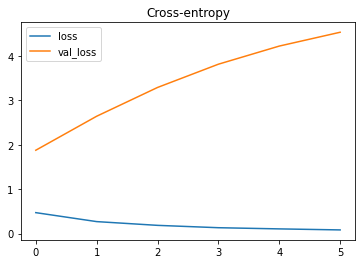

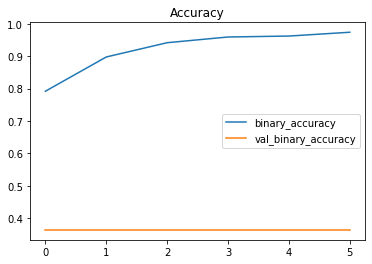

In [10]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

Puede ver que Keras lo mantendrá actualizado sobre la pérdida a medida que el modelo entrena.

Sin embargo, a menudo, una mejor manera de ver la pérdida es trazarla. De hecho, el método de ajuste mantiene un registro de la pérdida producida durante el entrenamiento en un objeto Historial. Convertiremos los datos a un marco de datos de Pandas, lo que facilita el trazado

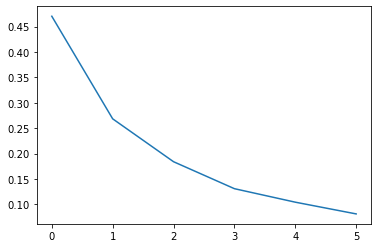

In [11]:
# convertir el historial de entrenamiento en un marco de datos
history_df = pd.DataFrame(history.history)
# utilizar el método de parcela nativa de Pandas
history_df['loss'].plot();